In [12]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('kaggle_music_genre_train.csv')

In [3]:
df_train

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.48000,0.670,182653.0,0.351,0.017600,D,0.1150,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.24300,0.452,187133.0,0.670,0.000051,A,0.1080,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.22800,0.454,173448.0,0.804,0.000000,E,0.1810,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.05580,0.847,255987.0,0.873,0.000003,G#,0.3250,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.22700,0.742,195333.0,0.575,0.000002,C,0.1760,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20389,47396.0,O Pato,0.71900,0.725,-1.0,0.483,0.000000,NaN,0.0797,-13.314,Minor,0.0438,87.413,4-Apr,0.942,Jazz
20390,44799.0,Mt. Washington,0.19000,0.482,198933.0,0.362,0.005620,F#,0.0913,-10.358,Minor,0.0299,76.879,4-Apr,0.174,Rock
20391,33350.0,Original Prankster,0.00061,0.663,220947.0,0.886,0.000025,D,0.2840,-4.149,Major,0.0358,146.803,4-Apr,0.942,Alternative
20392,77920.0,4Peat,0.00310,0.914,162214.0,0.515,0.000000,C#,0.1050,-9.934,Major,0.3560,150.016,4-Apr,0.215,Rap


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [5]:
# df_test = pd.read_csv('kaggle_music_genre_test.csv')

In [7]:
# df_test

Я считаю, что instance_id , track_name, obtained_date надо выбросить

In [10]:
df_train = df_train.drop(['instance_id', 'track_name', 'obtained_date'], axis =1)
df_train

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,0.48000,0.670,182653.0,0.351,0.017600,D,0.1150,-16.842,Major,0.0463,101.384,0.450,Country
1,0.24300,0.452,187133.0,0.670,0.000051,A,0.1080,-8.392,Minor,0.0352,113.071,0.539,Rock
2,0.22800,0.454,173448.0,0.804,0.000000,E,0.1810,-5.225,Minor,0.3710,80.980,0.344,Alternative
3,0.05580,0.847,255987.0,0.873,0.000003,G#,0.3250,-4.805,Minor,0.0804,116.007,0.966,Hip-Hop
4,0.22700,0.742,195333.0,0.575,0.000002,C,0.1760,-5.550,Major,0.0487,76.494,0.583,Alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20389,0.71900,0.725,-1.0,0.483,0.000000,NaN,0.0797,-13.314,Minor,0.0438,87.413,0.942,Jazz
20390,0.19000,0.482,198933.0,0.362,0.005620,F#,0.0913,-10.358,Minor,0.0299,76.879,0.174,Rock
20391,0.00061,0.663,220947.0,0.886,0.000025,D,0.2840,-4.149,Major,0.0358,146.803,0.942,Alternative
20392,0.00310,0.914,162214.0,0.515,0.000000,C#,0.1050,-9.934,Major,0.3560,150.016,0.215,Rap


In [73]:
df_train['music_genre'].value_counts()

music_genre
Blues          2858
Alternative    2601
Electronic     2564
Rap            2428
Rock           2165
Country        2120
Anime          1901
Classical      1373
Jazz           1239
Hip-Hop        1145
Name: count, dtype: int64

In [22]:
df_test['mode'].value_counts()

mode
Major    3177
Minor    1773
Name: count, dtype: int64

In [56]:
# sb.pairplot(df_train)

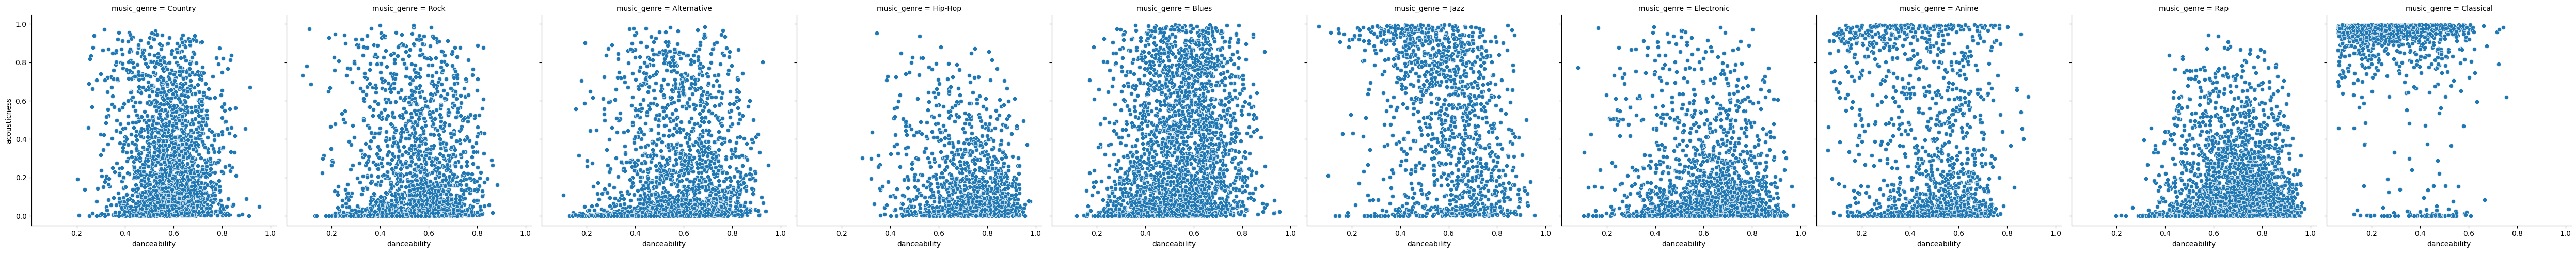

In [71]:
sb.relplot(
    x=df_train['danceability'],
    y=df_train['acousticness'], 
    # data=cars,
    # palette='bright',
    col=df_train['music_genre'])

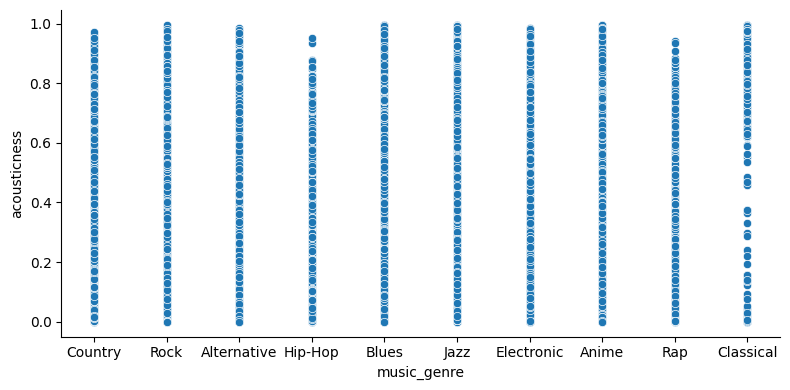

In [57]:
sb.relplot(
    x=df_train['music_genre'], 
    y=df_train['acousticness'],
    height=4, aspect=2)

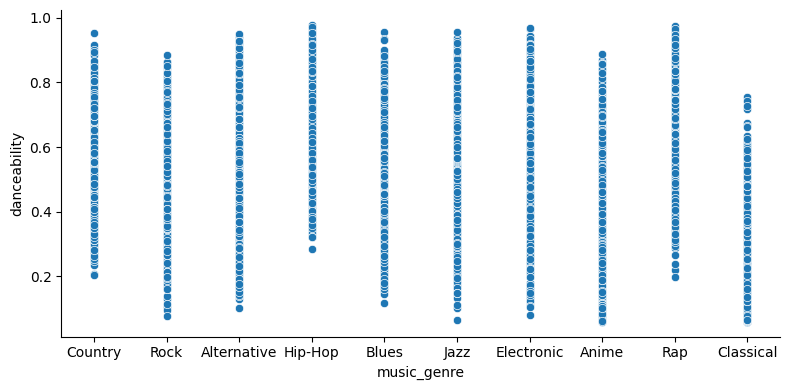

In [58]:
sb.relplot(
    x=df_train['music_genre'], 
    y=df_train['danceability'],
    height=4, aspect=2)

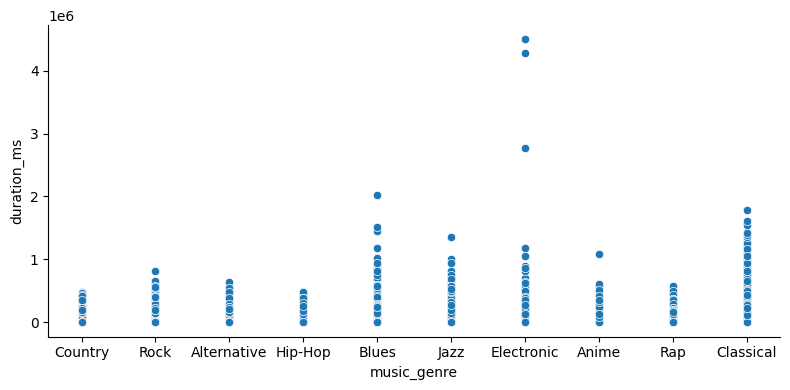

In [59]:
sb.relplot(
    x=df_train['music_genre'], 
    y=df_train['duration_ms'],
    height=4, aspect=2)

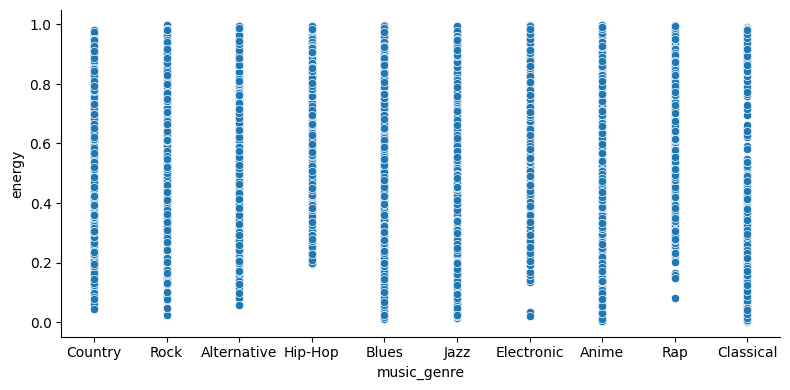

In [60]:
sb.relplot(
    x=df_train['music_genre'], 
    y=df_train['energy'],
    height=4, aspect=2)

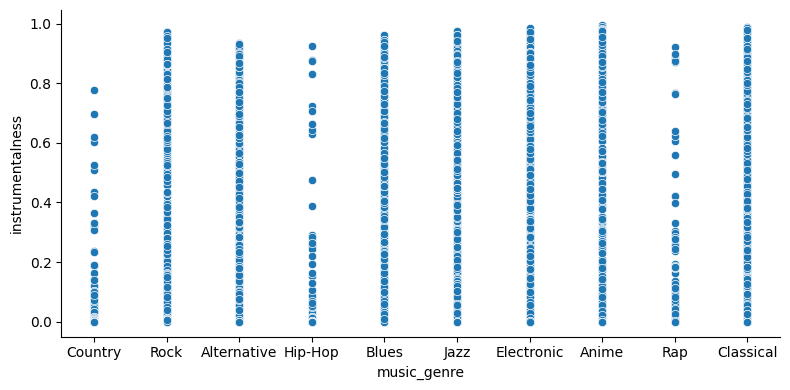

In [61]:
sb.relplot(
    x=df_train['music_genre'], 
    y=df_train['instrumentalness'],
    height=4, aspect=2)

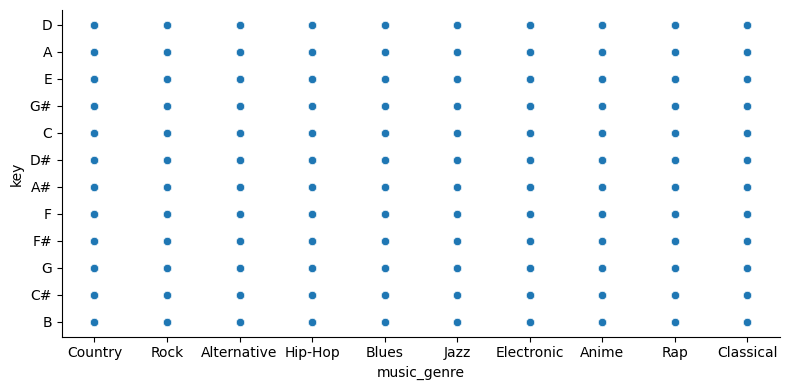

In [62]:
sb.relplot(
    x=df_train['music_genre'], 
    y=df_train['key'],
    height=4, aspect=2)

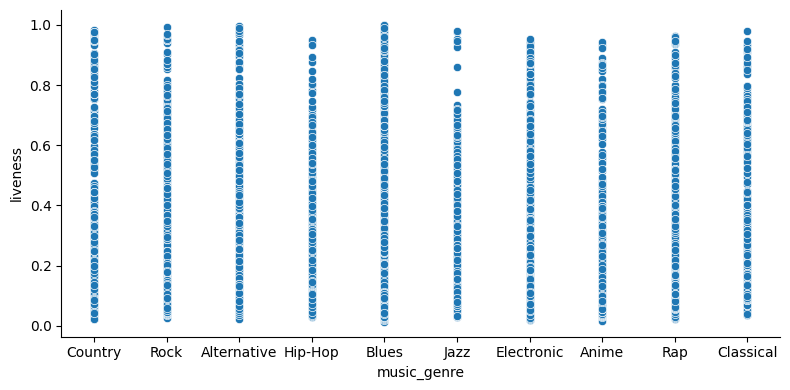

In [63]:
sb.relplot(
    x=df_train['music_genre'], 
    y=df_train['liveness'],
    height=4, aspect=2)

Text(0.5, 1.0, 'Тепловая карта корреляции переменных датасета')

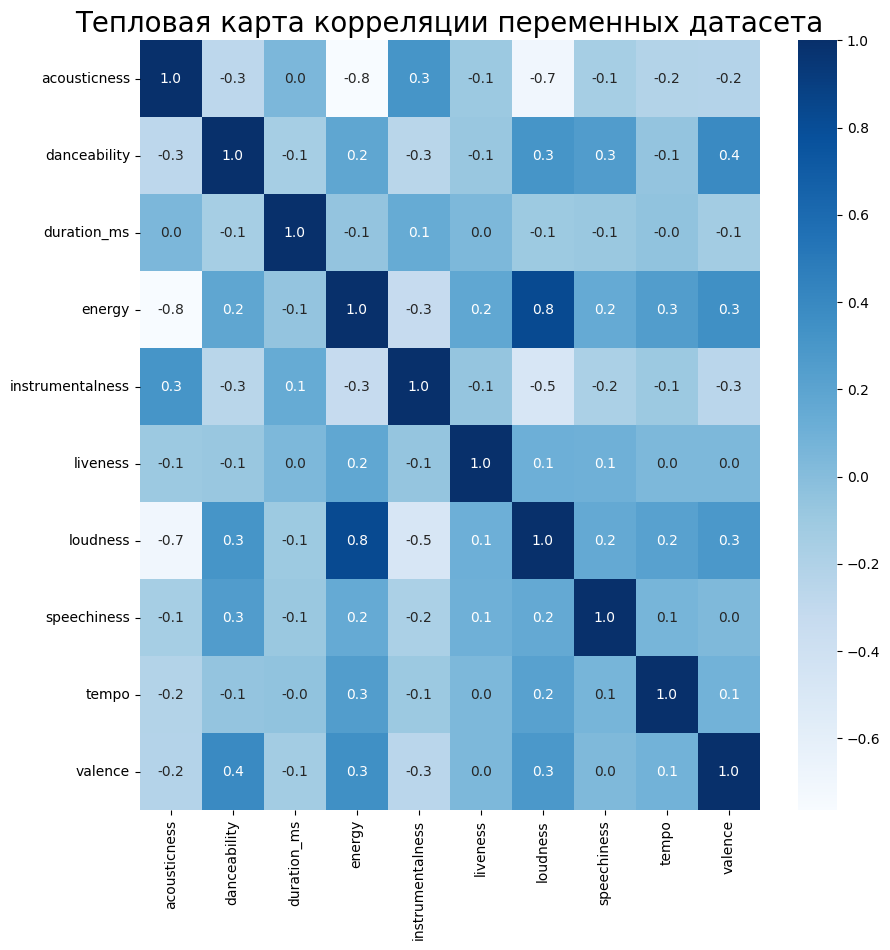

In [19]:
corr = df_train.drop(['key', 'mode', 'music_genre'],axis = 1).corr()
plt.figure(figsize = (10,10))

sb.heatmap(corr, cmap="Blues", annot=True,  fmt=".1f")
plt.title('Тепловая карта корреляции переменных датасета', fontsize = 20)

In [21]:
df_test.duplicated().sum()

0